<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/Multiple_linear_regression_model_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats
from statsmodels.graphics.regressionplots import influence_plot

In [60]:
ipl_data_df = pd.read_csv('IPL IMB381IPL2013.csv')

In [61]:
ipl_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [62]:
ipl_data_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [63]:
ipl_auction_df = ipl_data_df.drop(columns=['Sl.NO.', 'PLAYER NAME','TEAM','AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE' ])
x_features = ipl_auction_df.columns

In [64]:
x_features

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS',
       'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL'],
      dtype='object')

In [65]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [66]:
ipl_data_encoded_df = pd.get_dummies(ipl_data_df[x_features], columns = categorical_features, drop_first=True)

In [67]:
ipl_data_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [68]:
x_features = ipl_data_encoded_df.columns

In [69]:
ipl_data_encoded_df = ipl_data_encoded_df.astype(float)



In [70]:
x = sm.add_constant(ipl_data_encoded_df)
y = ipl_data_df['SOLD PRICE']

train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [71]:
ipl_model_1 = sm.OLS(train_y, train_x).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2026-02-17 12:32        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7997  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1773   86671.0156
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4196  752467.3803
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5171 1147625.0136
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6303  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9281  540068.7522
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6564
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7527  368875.0587
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9304  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6298  654891.6711
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1845  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0279  354416.7719
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0773  410167.8717
----------------------------------------------------------------

In [72]:

p_values = ipl_model_1.pvalues

significant_features = p_values[p_values < 0.05]

print(significant_features)


HS             0.036344
AVE            0.007061
AGE_2          0.046872
COUNTRY_ENG    0.006188
dtype: float64




*   The model says none of the other features influence sold price.
*   But this may be because of multi-collinearity - correlation among independent variables



**Handling Multi-collinearity**

*Checking for multi-collinearity with VIF*

In [73]:
def get_vif_factors(x):
    x_matrix = x.values  # Changed from x.as_matrix()
    vif = [variance_inflation_factor(x_matrix, i) for i in range (x_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [74]:
vif_factors = get_vif_factors(x[x_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


* Taking more than 4

In [75]:
columns_with_large_vif = vif_factors[vif_factors['VIF'] > 4].column
columns_with_large_vif

,column
0,T-RUNS
1,T-WKTS
2,ODI-RUNS-S
3,ODI-SR-B
4,ODI-WKTS
5,ODI-SR-BL
6,RUNS-S
7,HS
8,AVE
9,SR-B


Text(0.5, 1.0, 'Heatmap depictiong correlation between fatures')

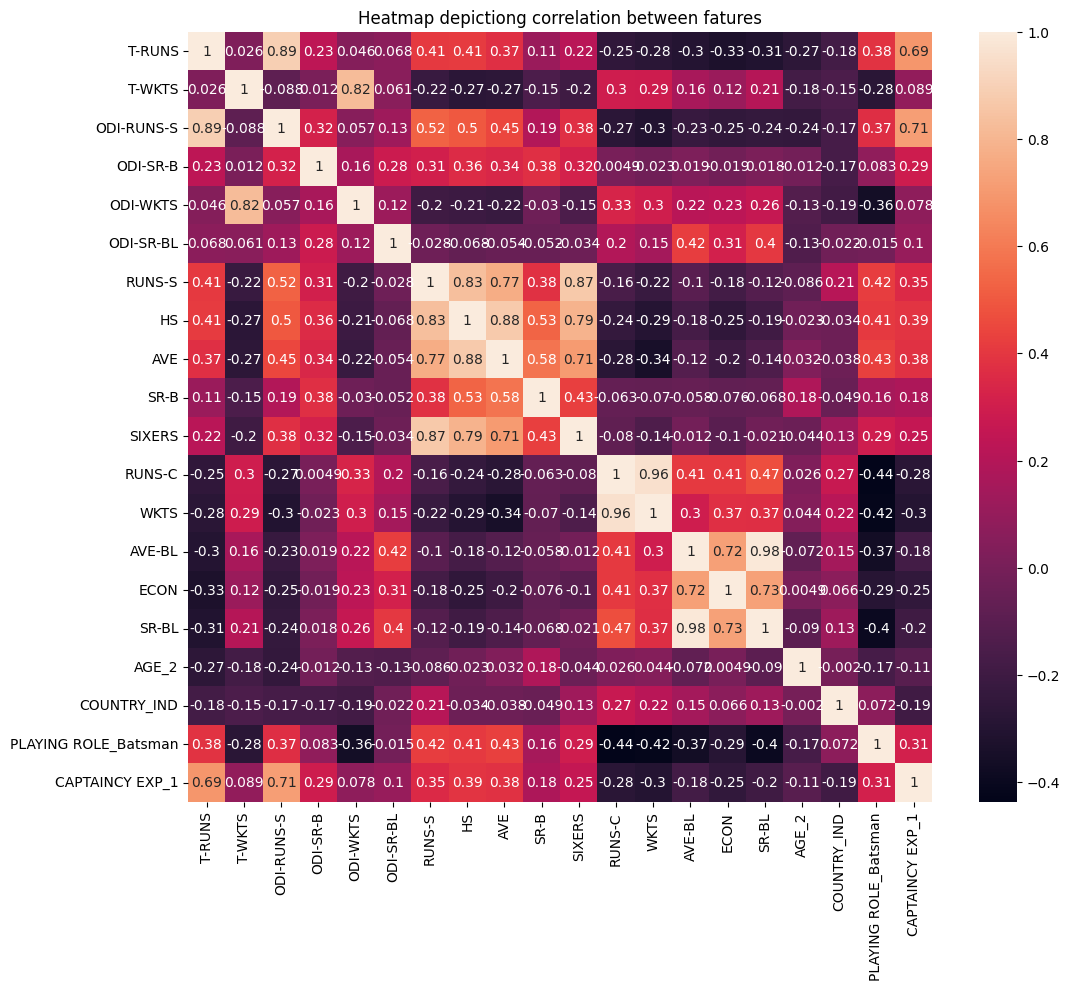

In [76]:
plt.figure(figsize=(12,10))
sns.heatmap(x[columns_with_large_vif].corr(), annot = True)
plt.title('Heatmap depictiong correlation between fatures')


* T-RUNS and ODI-RUNS-S, ODI-WKTS and T-WKTS are highly correlated
* RUNS-S, HS, AVE, SIXERS are highly correlated(batsman features)
* AVE-BL, ECON, SR-BL are highly correlated (bowlers faetures)

In [77]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 'ECON',
                         'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [78]:
x_new_features = list(set(x_features)- set(columns_to_be_removed))

In [79]:
get_vif_factors(x[x_new_features])

,column,VIF
0,COUNTRY_WI,1.194093
1,COUNTRY_BAN,1.094293
2,SIXERS,2.397409
3,COUNTRY_IND,3.144668
4,ODI-WKTS,2.742889
5,ODI-SR-BL,2.822148
6,WKTS,2.883101
7,AGE_3,1.779861
8,PLAYING ROLE_Bowler,3.060168
9,COUNTRY_SL,1.519752


<Axes: >

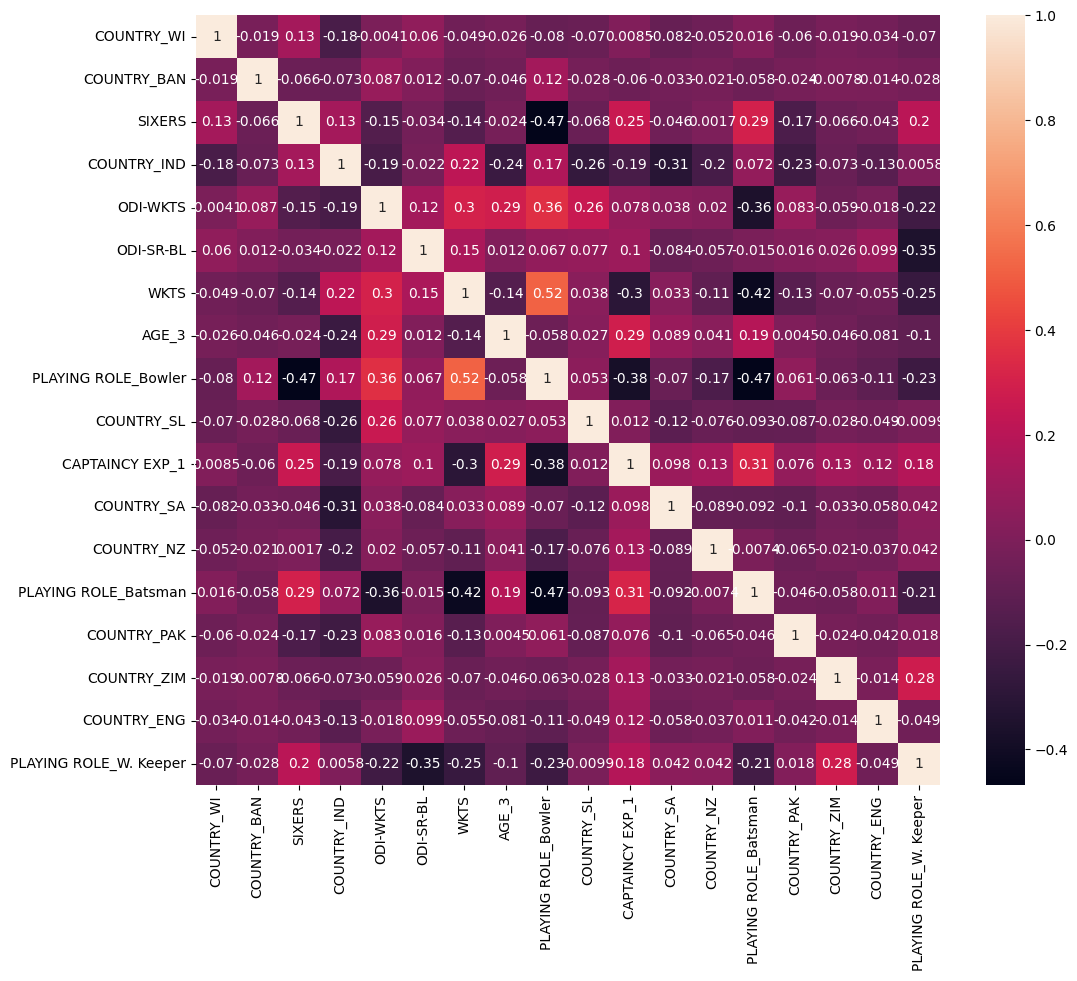

In [80]:

plt.figure(figsize=(12,10) )
sns.heatmap(x[x_new_features].corr(), annot=True)

**BUILDING A NEW MODEL AFTER REMOVING MULTI-COLLINEARITY**

In [81]:
train_x = train_x[x_new_features]

ipl_model_2 = sm.OLS(train_y, train_x).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2026-02-17 12:32   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2454
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6314  403448.7600
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6542  440086.1502
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5007  709026.1445
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7281  282672.8801
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model does
not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[3] The condition number is large, 1.49e+03. This might indicate                that
there are strong multicollinearity or other numerical                problems.
"""

In [82]:
p_values_2 = ipl_model_2.pvalues

significant_features_2 = p_values_2[p_values_2 < 0.05]

print(significant_features_2)

SIXERS             0.000301
COUNTRY_IND        0.004210
CAPTAINCY EXP_1    0.036583
COUNTRY_ENG        0.002181
dtype: float64


In [83]:
significant_vars = ['SIXERS', 'COUNTRY_IND', 'CAPTAINCY EXP_1', 'COUNTRY_ENG']

train_x = train_x[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_x).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2026-02-17 12:32 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

**RESIDUAL ANALYSIS**

*Test for Normality*

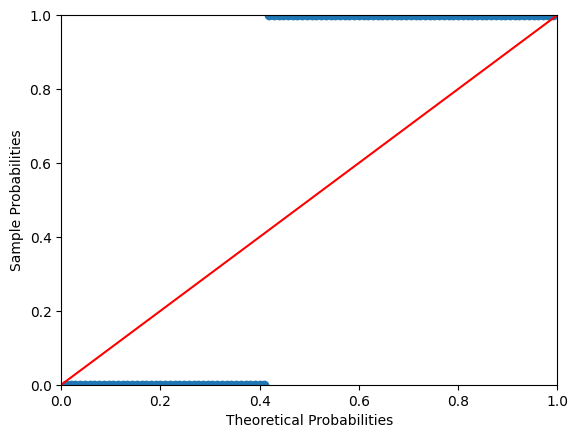

In [84]:
sm.ProbPlot(ipl_model_3.resid).ppplot(line = '45')
plt.show()

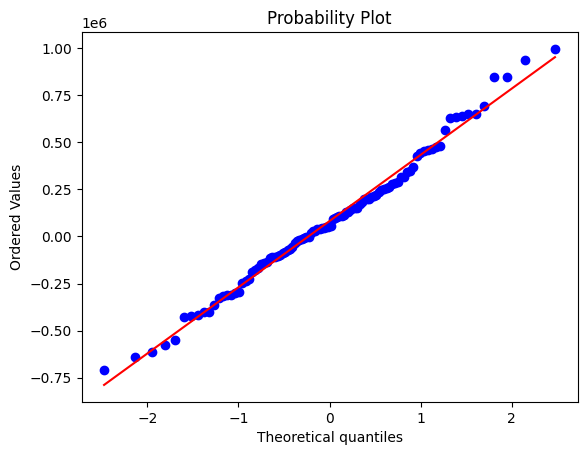

In [85]:
stats.probplot(ipl_model_3.resid, dist = 'norm', plot = plt)
plt.show()

*Test for homoscdesticity*

In [88]:
def get_standardised_values(values):
   return (values - values.mean())/values.std()

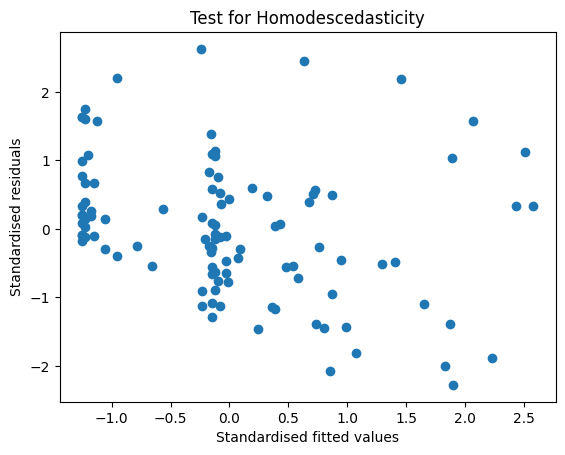

In [91]:
plt.scatter(get_standardised_values(ipl_model_3.fittedvalues), get_standardised_values(ipl_model_3.resid))
plt.title('Test for Homodescedasticity')
plt.xlabel('Standardised fitted values')
plt.ylabel('Standardised residuals')
plt.show()

* This is mostly homoscedastic

**OUTLIER ANALYSIS**

In [92]:
k = train_x.shape[1]
n = train_x.shape[0]

print(f'Number of variables: {k}')
print(f'Number of observations: {n}')


Number of variables: 4
Number of observations: 104


In [97]:
leverage_cutoff = 3*((k+1)/n)
print('leverage cutoff : ', round(leverage_cutoff, 3))

leverage cutoff :  0.144


* observations with leverage cutoff 0.144 are highly influential

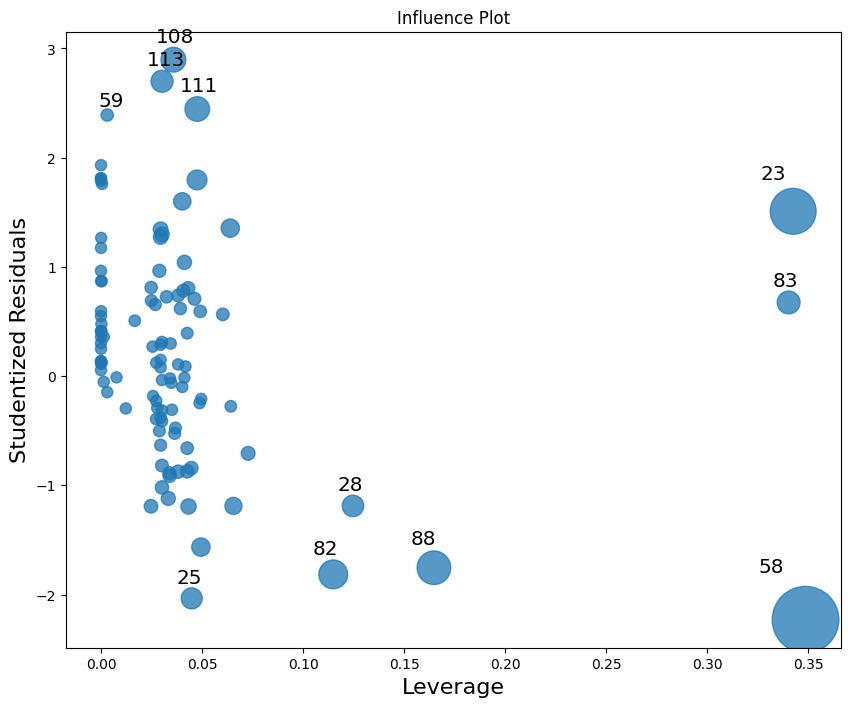

In [99]:

fig, ax = plt.subplots(figsize=(10,8))
influence_plot(ipl_model_3, ax = ax)
plt.title('Influence Plot')
plt.show()

* 23, 58, 83 are highly influential points.

In [100]:
ipl_data_df[ipl_data_df.index.isin([23,58,83])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [ ]:
train_x_new = train_x.drop([23,58,83], axis = 0)
train_y_new = train_y.drop([23,58,83], axis = 0)